# Graphs

Examples for the graph learning algorithms and mapper

## Growing Neural Gas

Epoch 0,  12 nodes
Epoch 1,  21 nodes
Epoch 2,  31 nodes
Epoch 3,  40 nodes
Epoch 4,  50 nodes
Epoch 5,  60 nodes
Epoch 6,  70 nodes
Epoch 7,  79 nodes
Epoch 8,  89 nodes
Epoch 9,  99 nodes


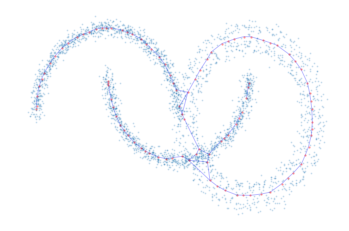

In [7]:
# Growing Neural Gas example code
import numpy as np
from topolearn.graph import gng
from topolearn.util import plot_graph_with_data
from sklearn.datasets import make_moons, make_circles

X1, _ = make_moons(noise=0.05, n_samples=2000)
X2, _ = make_circles(noise=0.05, n_samples=1000)
X2[:, 0] += 2
X = np.vstack((X1, X2))

learner = gng.GrowingNeuralGas(max_nodes=200)
graph = learner.fit(X)

plot_graph_with_data(graph, X)


## Self Organising Maps

Epoch: 0, error: 40.61040584760687
Epoch: 100, error: 14.490851074123476
Epoch: 200, error: 8.575233988554166
Epoch: 300, error: 6.586884936892578
Convergence in 311 steps
Epoch: 0, error: 41.50316757103183
Epoch: 100, error: 12.90862567648368
Convergence in 160 steps


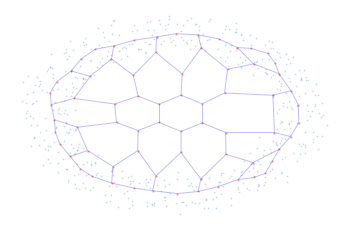

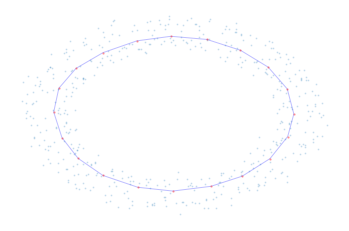

In [8]:
# Self Organising Map example code
import networkx as nx
from topolearn.graph import som
from topolearn.util import plot_graph_with_data

from sklearn.datasets import make_moons, make_circles

X, y = make_circles(noise=0.05, n_samples=500)

# Example 1: Fit a 5 x 5 hexagonal grid
geometry = nx.hexagonal_lattice_graph(5, 5) 
learner = som.SelfOrganisingMaps(graph=geometry, alpha=0.001, conv_rate=0.001)
graph = learner.fit(X)
plot_graph_with_data(graph, X)


# Example 2: Fit a circle
geometry = nx.cycle_graph(20)
learner = som.SelfOrganisingMaps(graph=geometry, alpha=0.001, conv_rate=0.001)
graph = learner.fit(X)
plot_graph_with_data(graph, X)



## Generative Gaussian Graphs 

Iteration 0, sigma=0.6882313286283405
Iteration 1, sigma=0.548335476868336
Iteration 2, sigma=0.4603728138453049
Iteration 3, sigma=0.39528467535029915
Iteration 4, sigma=0.34132652755732296
Iteration 5, sigma=0.2917232768581678
Iteration 6, sigma=0.24273490760273636
Iteration 7, sigma=0.19419443991162053
Iteration 8, sigma=0.14963214942965813
Iteration 9, sigma=0.11406679208617165
Iteration 10, sigma=0.09008418776675482
Iteration 11, sigma=0.07651980376426903
Iteration 12, sigma=0.06954670759840036
Iteration 13, sigma=0.06591597992532641
Iteration 14, sigma=0.06390817574766834
Iteration 15, sigma=0.0627094999497538
Iteration 16, sigma=0.06193546372565236
Iteration 17, sigma=0.06139979571393047
Iteration 18, sigma=0.06100848135987438
Iteration 19, sigma=0.060711285380696985
Iteration 20, sigma=0.06047941701608082
Iteration 21, sigma=0.06029509574589192
Iteration 22, sigma=0.060146557846457976
Iteration 23, sigma=0.0600255743778669
Iteration 24, sigma=0.0599261493160651
Iteration 25, si

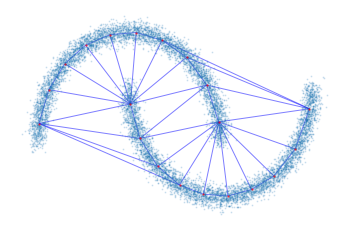

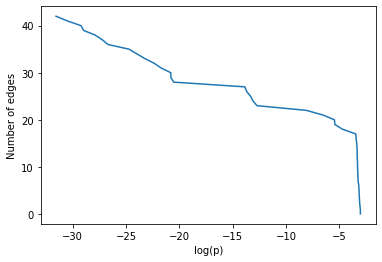

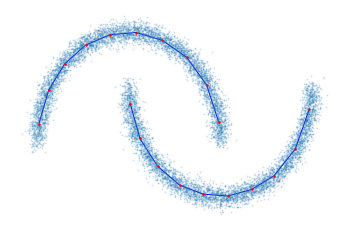

In [2]:
# Generative Gaussian Graph example code

from topolearn.graph import ggg
from topolearn.util import plot_graph_with_data
from sklearn.datasets import make_moons, make_circles
import numpy as np

X, y = make_moons(noise=0.05, n_samples=10000)
learner = ggg.GenerativeGaussianGraph(k=20, sigma=1, max_iter=100, init_method="KMeans")
graph = learner.fit(X)
# Plot the full graph fitted by gnn or kmeans
plot_graph_with_data(learner.graph, X, alpha=0.5)

# Plot number of eges vs log probabilties to identify interesting scales
learner.kneeplot()
# We select eps=exp(-4) as cutoff value based on the knee plot 
# Get a pruned graph and plot
plot_graph_with_data( learner.pruned_graph(np.exp(-4)), X, alpha=1)



## Mapper

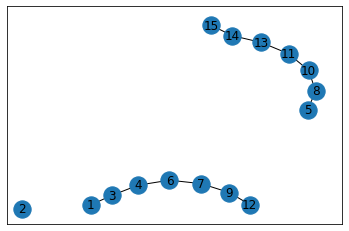

In [1]:
# Mapper example code
from matplotlib.pyplot import plot, scatter
import networkx as nx
import importlib

from sklearn.datasets import make_moons, make_circles

X, y = make_moons(noise=0.01, random_state=1, n_samples=100)
from topolearn.graph import Mapper

g = Mapper()
graph = g.fit(X)


nx.draw_networkx(graph)